In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import math
import datetime
import calendar
import time
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load Dataset

In [ ]:
#taxi trip data
start = time.time()

data = pd.read_csv('/content/drive/MyDrive/data/Taxi_Trips_-_2023.csv')

end = time.time()
print("Time taken by above cell is {}.".format((end-start)))

Time taken by above cell is 42.45111393928528.


In [ ]:
data

,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,Extras,Trip Total,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
0,0fca59218b11688279d795c03c4d16f851f13fa0,e2c349c7cbb608d552aa0b5814031943f13641ef9e50d8...,01/01/2023 12:00:00 AM,01/01/2023 12:15:00 AM,1037.0,4.82,NaN,NaN,6.0,32.0,...,0.0,19.50,Credit Card,Taxicab Insurance Agency Llc,41.944227,-87.655998,POINT (-87.6559981815 41.9442266014),41.878866,-87.625192,POINT (-87.6251921424 41.8788655841)
1,1e539d6e7501164c6b76b761c3152c235e206d59,4ab7a7510c1ebcc9b2e3eaa7bdd6508dbea34da7986aca...,01/01/2023 12:00:00 AM,01/01/2023 12:15:00 AM,1341.0,16.63,NaN,NaN,76.0,8.0,...,6.0,53.00,Credit Card,Sun Taxi,41.980264,-87.913625,POINT (-87.913624596 41.9802643146),41.899602,-87.633308,POINT (-87.6333080367 41.899602111)
2,2b3c5200439d51f626b60380809bbbcca766a85b,8c76eb82f069c0731a0049cb78898f02cc5ac6990244c9...,01/01/2023 12:00:00 AM,01/01/2023 12:15:00 AM,844.0,3.84,NaN,NaN,24.0,8.0,...,0.0,20.17,Mobile,Sun Taxi,41.901207,-87.676356,POINT (-87.6763559892 41.9012069941),41.899602,-87.633308,POINT (-87.6333080367 41.899602111)
3,45b2ea39cfff64d61a46ef016e16f8ee74e9ed23,a688de71e9eb70603ba839dc7faf949968ae3e971e0575...,01/01/2023 12:00:00 AM,01/01/2023 12:00:00 AM,361.0,0.63,NaN,NaN,32.0,32.0,...,1.0,6.50,Cash,5 Star Taxi,41.878866,-87.625192,POINT (-87.6251921424 41.8788655841),41.878866,-87.625192,POINT (-87.6251921424 41.8788655841)
4,464df6aaaf97ca8745985c2a5b2e481067a2bfb6,8b1a88e5a09cfd55ca72d267f00f56fa50a42aa322bdfe...,01/01/2023 12:00:00 AM,01/01/2023 12:15:00 AM,704.0,0.99,NaN,NaN,14.0,14.0,...,0.0,7.75,Cash,Flash Cab,41.968069,-87.721559,POINT (-87.7215590627 41.968069),41.968069,-87.721559,POINT (-87.7215590627 41.968069)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3783725,dd73fc42893c669a31dd79a377ffea6138417f02,8b11a1727a85dc849f117c39cd42b7bab4b7e8ef32d0a2...,08/01/2023 12:00:00 AM,08/01/2023 12:15:00 AM,1560.0,15.10,NaN,NaN,76.0,7.0,...,4.0,51.70,Credit Card,Choice Taxi Association,41.980264,-87.913625,POINT (-87.913624596 41.9802643146),41.922686,-87.649489,POINT (-87.6494887289 41.9226862843)
3783726,e2324b472c8e10e3ca79e602ded14f3fcccfbda7,617a9ea2929aa34568d879ef9400c1be77f2f96388cbec...,08/01/2023 12:00:00 AM,08/01/2023 12:15:00 AM,1059.0,16.43,1.703198e+10,1.703108e+10,76.0,8.0,...,4.0,53.70,Credit Card,Taxicab Insurance Agency Llc,41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),41.893216,-87.637844,POINT (-87.6378442095 41.8932163595)
3783727,ebdbe9cb5b6699de234104f5868786d0f2dfb02a,f962126062d38e2ef0fa177812eba73ccd30513c1c6cfa...,08/01/2023 12:00:00 AM,08/01/2023 12:00:00 AM,282.0,2.99,1.703198e+10,1.703177e+10,76.0,NaN,...,5.0,18.60,Credit Card,City Service,41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),41.982775,-87.877305,POINT (-87.8773053996 41.9827750091)
3783728,e9feb02a8c64dff17769474f2847388e11d89596,6fa14d5429bf60e4d0fdb5f5d737c7e58e2ba99e1c6f77...,08/01/2023 12:00:00 AM,08/01/2023 12:15:00 AM,1320.0,17.84,1.703198e+10,NaN,76.0,NaN,...,29.5,88.80,Credit Card,Sun Taxi,41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3783730 entries, 0 to 3783729
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Trip ID                     object 
 1   Taxi ID                     object 
 2   Trip Start Timestamp        object 
 3   Trip End Timestamp          object 
 4   Trip Seconds                float64
 5   Trip Miles                  float64
 6   Pickup Census Tract         float64
 7   Dropoff Census Tract        float64
 8   Pickup Community Area       float64
 9   Dropoff Community Area      float64
 10  Fare                        float64
 11  Tips                        float64
 12  Tolls                       float64
 13  Extras                      float64
 14  Trip Total                  float64
 15  Payment Type                object 
 16  Company                     object 
 17  Pickup Centroid Latitude    float64
 18  Pickup Centroid Longitude   float64
 19  Pickup Centroid Locat

In [ ]:
data.isnull().sum()

Trip ID                             0
Taxi ID                           153
Trip Start Timestamp                0
Trip End Timestamp                 48
Trip Seconds                      718
Trip Miles                         13
Pickup Census Tract           2133498
Dropoff Census Tract          2166107
Pickup Community Area          167767
Dropoff Community Area         364684
Fare                             5403
Tips                             5403
Tolls                            5403
Extras                           5403
Trip Total                       5403
Payment Type                        0
Company                             0
Pickup Centroid Latitude       166379
Pickup Centroid Longitude      166379
Pickup Centroid Location       166379
Dropoff Centroid Latitude      341795
Dropoff Centroid Longitude     341795
Dropoff Centroid  Location     341795
dtype: int64

In [ ]:
# weather data

weather = pd.read_csv('/content/drive/MyDrive/data/chicago_weather_data.csv')
weather

,YEAR,MO,DY,HR,TEMP,PRCP,HMDT,WND_SPD,ATM_PRESS,REF
0,2021,3,31,18,2.87,0.00,59.62,7.72,100.30,202103
1,2021,3,31,19,2.68,0.00,62.12,7.64,100.38,202103
2,2021,3,31,20,2.34,0.00,66.19,7.88,100.44,202103
3,2021,3,31,21,1.88,0.00,69.12,8.09,100.48,202103
4,2021,3,31,22,1.54,0.00,67.50,8.28,100.52,202103
...,...,...,...,...,...,...,...,...,...,...
24103,2023,12,31,13,1.30,0.08,82.81,5.49,99.19,202312
24104,2023,12,31,14,1.58,0.10,84.31,5.62,99.26,202312
24105,2023,12,31,15,1.65,0.14,87.75,5.79,99.32,202312
24106,2023,12,31,16,1.62,0.20,91.06,6.68,99.38,202312


In [ ]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24108 entries, 0 to 24107
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YEAR       24108 non-null  int64  
 1   MO         24108 non-null  int64  
 2   DY         24108 non-null  int64  
 3   HR         24108 non-null  int64  
 4   TEMP       24108 non-null  float64
 5   PRCP       24108 non-null  float64
 6   HMDT       24108 non-null  float64
 7   WND_SPD    24108 non-null  float64
 8   ATM_PRESS  24108 non-null  float64
 9   REF        24108 non-null  int64  
dtypes: float64(5), int64(5)
memory usage: 1.8 MB


In [ ]:
weather = weather.loc[weather['YEAR'] == 2023,:]
weather.reset_index(drop=True, inplace=True)
weather.drop(columns=['ATM_PRESS','REF'], inplace=True)

<ipython-input-73-4651e1f64c74>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather.drop(columns=['ATM_PRESS','REF'], inplace=True)


In [ ]:
weather.head()

,YEAR,MO,DY,HR,TEMP,PRCP,HMDT,WND_SPD
0,2023,1,1,0,2.05,0.53,95.88,5.17
1,2023,1,1,1,2.30,1.47,95.75,6.03
2,2023,1,1,2,2.50,2.05,96.00,6.30
3,2023,1,1,3,2.61,1.07,95.94,5.58
4,2023,1,1,4,2.83,0.29,95.69,5.31


# Data Cleaning

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3783730 entries, 0 to 3783729
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Trip ID                     object 
 1   Taxi ID                     object 
 2   Trip Start Timestamp        object 
 3   Trip End Timestamp          object 
 4   Trip Seconds                float64
 5   Trip Miles                  float64
 6   Pickup Census Tract         float64
 7   Dropoff Census Tract        float64
 8   Pickup Community Area       float64
 9   Dropoff Community Area      float64
 10  Fare                        float64
 11  Tips                        float64
 12  Tolls                       float64
 13  Extras                      float64
 14  Trip Total                  float64
 15  Payment Type                object 
 16  Company                     object 
 17  Pickup Centroid Latitude    float64
 18  Pickup Centroid Longitude   float64
 19  Pickup Centroid Locat

In [ ]:
data.columns

Index(['Trip ID', 'Taxi ID', 'Trip Start Timestamp', 'Trip End Timestamp',
       'Trip Seconds', 'Trip Miles', 'Pickup Census Tract',
       'Dropoff Census Tract', 'Pickup Community Area',
       'Dropoff Community Area', 'Fare', 'Tips', 'Tolls', 'Extras',
       'Trip Total', 'Payment Type', 'Company', 'Pickup Centroid Latitude',
       'Pickup Centroid Longitude', 'Pickup Centroid Location',
       'Dropoff Centroid Latitude', 'Dropoff Centroid Longitude',
       'Dropoff Centroid  Location'],
      dtype='object')

In [ ]:
col_obj = ['Trip ID', 'Taxi ID', 'Payment Type', 'Company']

le = LabelEncoder()

for col in col_obj:
    data[col] = le.fit_transform(data[col])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3783730 entries, 0 to 3783729
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Trip ID                     int64  
 1   Taxi ID                     int64  
 2   Trip Start Timestamp        object 
 3   Trip End Timestamp          object 
 4   Trip Seconds                float64
 5   Trip Miles                  float64
 6   Pickup Census Tract         float64
 7   Dropoff Census Tract        float64
 8   Pickup Community Area       float64
 9   Dropoff Community Area      float64
 10  Fare                        float64
 11  Tips                        float64
 12  Tolls                       float64
 13  Extras                      float64
 14  Trip Total                  float64
 15  Payment Type                int64  
 16  Company                     int64  
 17  Pickup Centroid Latitude    float64
 18  Pickup Centroid Longitude   float64
 19  Pickup Centroid Locat

In [ ]:
data.isnull().sum()

Trip ID                             0
Taxi ID                             0
Trip Start Timestamp                0
Trip End Timestamp                 48
Trip Seconds                      718
Trip Miles                         13
Pickup Census Tract           2133498
Dropoff Census Tract          2166107
Pickup Community Area          167767
Dropoff Community Area         364684
Fare                             5403
Tips                             5403
Tolls                            5403
Extras                           5403
Trip Total                       5403
Payment Type                        0
Company                             0
Pickup Centroid Latitude       166379
Pickup Centroid Longitude      166379
Pickup Centroid Location       166379
Dropoff Centroid Latitude      341795
Dropoff Centroid Longitude     341795
Dropoff Centroid  Location     341795
dtype: int64

In [ ]:
data.nunique()

Trip ID                       3783730
Taxi ID                          3189
Trip Start Timestamp            20349
Trip End Timestamp              20367
Trip Seconds                    12414
Trip Miles                       6354
Pickup Census Tract               545
Dropoff Census Tract              698
Pickup Community Area              77
Dropoff Community Area             77
Fare                             7589
Tips                             3167
Tolls                             361
Extras                           2035
Trip Total                      12522
Payment Type                        7
Company                            37
Pickup Centroid Latitude          537
Pickup Centroid Longitude         537
Pickup Centroid Location          538
Dropoff Centroid Latitude         604
Dropoff Centroid Longitude        604
Dropoff Centroid  Location        605
dtype: int64

In [ ]:
taxi = data[[
                'Trip ID', 'Trip Start Timestamp', 'Trip Seconds', 'Trip Miles',
                'Trip Total', 'Company', 'Pickup Community Area','Dropoff Community Area',
                'Pickup Centroid Latitude', 'Pickup Centroid Longitude',
                'Dropoff Centroid Latitude', 'Dropoff Centroid Longitude'
            ]]
taxi

,Trip ID,Trip Start Timestamp,Trip Seconds,Trip Miles,Trip Total,Company,Pickup Community Area,Dropoff Community Area,Pickup Centroid Latitude,Pickup Centroid Longitude,Dropoff Centroid Latitude,Dropoff Centroid Longitude
0,233811,01/01/2023 12:00:00 AM,1037.0,4.82,19.50,32,6.0,32.0,41.944227,-87.655998,41.878866,-87.625192
1,448556,01/01/2023 12:00:00 AM,1341.0,16.63,53.00,29,76.0,8.0,41.980264,-87.913625,41.899602,-87.633308
2,638830,01/01/2023 12:00:00 AM,844.0,3.84,20.17,29,24.0,8.0,41.901207,-87.676356,41.899602,-87.633308
3,1029441,01/01/2023 12:00:00 AM,361.0,0.63,6.50,7,32.0,32.0,41.878866,-87.625192,41.878866,-87.625192
4,1038343,01/01/2023 12:00:00 AM,704.0,0.99,7.75,19,14.0,14.0,41.968069,-87.721559,41.968069,-87.721559
...,...,...,...,...,...,...,...,...,...,...,...,...
3783725,3272691,08/01/2023 12:00:00 AM,1560.0,15.10,51.70,16,76.0,7.0,41.980264,-87.913625,41.922686,-87.649489
3783726,3343072,08/01/2023 12:00:00 AM,1059.0,16.43,53.70,32,76.0,8.0,41.979071,-87.903040,41.893216,-87.637844
3783727,3486146,08/01/2023 12:00:00 AM,282.0,2.99,18.60,18,76.0,NaN,41.979071,-87.903040,41.982775,-87.877305
3783728,3458843,08/01/2023 12:00:00 AM,1320.0,17.84,88.80,29,76.0,NaN,41.979071,-87.903040,NaN,NaN


In [ ]:
taxi = taxi.dropna()
taxi

,Trip ID,Trip Start Timestamp,Trip Seconds,Trip Miles,Trip Total,Company,Pickup Community Area,Dropoff Community Area,Pickup Centroid Latitude,Pickup Centroid Longitude,Dropoff Centroid Latitude,Dropoff Centroid Longitude
0,233811,01/01/2023 12:00:00 AM,1037.0,4.82,19.50,32,6.0,32.0,41.944227,-87.655998,41.878866,-87.625192
1,448556,01/01/2023 12:00:00 AM,1341.0,16.63,53.00,29,76.0,8.0,41.980264,-87.913625,41.899602,-87.633308
2,638830,01/01/2023 12:00:00 AM,844.0,3.84,20.17,29,24.0,8.0,41.901207,-87.676356,41.899602,-87.633308
3,1029441,01/01/2023 12:00:00 AM,361.0,0.63,6.50,7,32.0,32.0,41.878866,-87.625192,41.878866,-87.625192
4,1038343,01/01/2023 12:00:00 AM,704.0,0.99,7.75,19,14.0,14.0,41.968069,-87.721559,41.968069,-87.721559
...,...,...,...,...,...,...,...,...,...,...,...,...
3783720,2902997,08/01/2023 12:00:00 AM,1850.0,23.46,72.75,23,76.0,39.0,41.980264,-87.913625,41.808916,-87.596183
3783722,3004241,08/01/2023 12:00:00 AM,780.0,6.00,25.25,13,28.0,5.0,41.874005,-87.663518,41.947792,-87.683835
3783725,3272691,08/01/2023 12:00:00 AM,1560.0,15.10,51.70,16,76.0,7.0,41.980264,-87.913625,41.922686,-87.649489
3783726,3343072,08/01/2023 12:00:00 AM,1059.0,16.43,53.70,32,76.0,8.0,41.979071,-87.903040,41.893216,-87.637844


In [ ]:
taxi.isnull().sum()

Trip ID                       0
Trip Start Timestamp          0
Trip Seconds                  0
Trip Miles                    0
Trip Total                    0
Company                       0
Pickup Community Area         0
Dropoff Community Area        0
Pickup Centroid Latitude      0
Pickup Centroid Longitude     0
Dropoff Centroid Latitude     0
Dropoff Centroid Longitude    0
dtype: int64

In [ ]:
# Trip Seconds Clean-up

m = np.mean(taxi['Trip Seconds'])
s = np.std(taxi['Trip Seconds'])
taxi = taxi[taxi['Trip Seconds'] <= m + 2*s]
taxi = taxi[taxi['Trip Seconds'] >= m - 2*s]

In [ ]:
new_names = {'Pickup Centroid Longitude': 'pickup_longitude', 'Pickup Centroid Latitude': 'pickup_latitude',
            'Dropoff Centroid Latitude': 'dropoff_latitude', 'Dropoff Centroid Longitude': 'dropoff_longitude',
            'Trip Start Timestamp': 'pickup_datetime'}
taxi = taxi.rename(columns=new_names)
taxi

,Trip ID,pickup_datetime,Trip Seconds,Trip Miles,Trip Total,Company,Pickup Community Area,Dropoff Community Area,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
0,233811,01/01/2023 12:00:00 AM,1037.0,4.82,19.50,32,6.0,32.0,41.944227,-87.655998,41.878866,-87.625192
1,448556,01/01/2023 12:00:00 AM,1341.0,16.63,53.00,29,76.0,8.0,41.980264,-87.913625,41.899602,-87.633308
2,638830,01/01/2023 12:00:00 AM,844.0,3.84,20.17,29,24.0,8.0,41.901207,-87.676356,41.899602,-87.633308
3,1029441,01/01/2023 12:00:00 AM,361.0,0.63,6.50,7,32.0,32.0,41.878866,-87.625192,41.878866,-87.625192
4,1038343,01/01/2023 12:00:00 AM,704.0,0.99,7.75,19,14.0,14.0,41.968069,-87.721559,41.968069,-87.721559
...,...,...,...,...,...,...,...,...,...,...,...,...
3783720,2902997,08/01/2023 12:00:00 AM,1850.0,23.46,72.75,23,76.0,39.0,41.980264,-87.913625,41.808916,-87.596183
3783722,3004241,08/01/2023 12:00:00 AM,780.0,6.00,25.25,13,28.0,5.0,41.874005,-87.663518,41.947792,-87.683835
3783725,3272691,08/01/2023 12:00:00 AM,1560.0,15.10,51.70,16,76.0,7.0,41.980264,-87.913625,41.922686,-87.649489
3783726,3343072,08/01/2023 12:00:00 AM,1059.0,16.43,53.70,32,76.0,8.0,41.979071,-87.903040,41.893216,-87.637844


In [ ]:
# Longtitude & Latitude Clean-up
# Remove rides to and from far away areas

# Chicago's longitude borders (west to east)
city_long_border = (-87.93, -87.52)

# Chicago's latitude borders (south to north)
city_lat_border = (41.65, 42.00)


taxi = taxi[(taxi.pickup_longitude> city_long_border[0]) & (taxi.pickup_longitude < city_long_border[1])]
taxi = taxi[(taxi.dropoff_longitude> city_long_border[0]) & (taxi.dropoff_longitude < city_long_border[1])]
taxi = taxi[(taxi.pickup_latitude> city_lat_border[0]) & (taxi.pickup_latitude < city_lat_border[1])]
taxi = taxi[(taxi.dropoff_latitude> city_lat_border[0]) & (taxi.dropoff_latitude < city_lat_border[1])]

In [ ]:
# Create a binary feature for same pickup and dropoff
taxi['Same Pickup and Dropoff'] = (taxi['Pickup Community Area'] == taxi['Dropoff Community Area']).astype(int)

taxi_ = taxi[taxi['Same Pickup and Dropoff'] != 1]

<ipython-input-86-0bd9a14edfc5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi['Same Pickup and Dropoff'] = (taxi['Pickup Community Area'] == taxi['Dropoff Community Area']).astype(int)


In [ ]:
def haversine_(lat1, lng1, lat2, lng2):
    """function to calculate haversine distance between two co-ordinates"""
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return(h)

def manhattan_distance_pd(lat1, lng1, lat2, lng2):
    """function to calculate manhatten distance between pick_drop"""
    a = haversine_(lat1, lng1, lat1, lng2)
    b = haversine_(lat1, lng1, lat2, lng1)
    return a + b

In [ ]:
# Date Clean-up

taxi_['pickup_datetime'] = pd.to_datetime(taxi_.pickup_datetime)
taxi_.loc[:, 'month'] = taxi_['pickup_datetime'].dt.month
taxi_.loc[:, 'hour'] = taxi_['pickup_datetime'].dt.hour
taxi_.loc[:, 'week_of_year'] = taxi_['pickup_datetime'].dt.strftime("%U").astype(int)
taxi_.loc[:, 'day_of_week'] = taxi_['pickup_datetime'].dt.dayofweek
taxi_.loc[:,'hvsine_pick_drop'] = haversine_(taxi_['pickup_latitude'].values, taxi_['pickup_longitude'].values, taxi_['dropoff_latitude'].values, taxi_['dropoff_longitude'].values)
taxi_.loc[:,'manhtn_pick_drop'] = manhattan_distance_pd(taxi_['pickup_latitude'].values, taxi_['pickup_longitude'].values, taxi_['dropoff_latitude'].values, taxi_['dropoff_longitude'].values)
taxi_.loc[:, 'day_of_month'] = taxi_['pickup_datetime'].dt.day

<ipython-input-88-7486d3c718c7>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  taxi_['pickup_datetime'] = pd.to_datetime(taxi_.pickup_datetime)
<ipython-input-88-7486d3c718c7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi_['pickup_datetime'] = pd.to_datetime(taxi_.pickup_datetime)
<ipython-input-88-7486d3c718c7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

In [ ]:
taxi_.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2560363 entries, 0 to 3783729
Data columns (total 20 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   Trip ID                  int64         
 1   pickup_datetime          datetime64[ns]
 2   Trip Seconds             float64       
 3   Trip Miles               float64       
 4   Trip Total               float64       
 5   Company                  int64         
 6   Pickup Community Area    float64       
 7   Dropoff Community Area   float64       
 8   pickup_latitude          float64       
 9   pickup_longitude         float64       
 10  dropoff_latitude         float64       
 11  dropoff_longitude        float64       
 12  Same Pickup and Dropoff  int64         
 13  month                    int32         
 14  hour                     int32         
 15  week_of_year             int64         
 16  day_of_week              int32         
 17  hvsine_pick_drop         float64

In [ ]:
taxi_[['hvsine_pick_drop','manhtn_pick_drop','Trip Miles']]

,hvsine_pick_drop,manhtn_pick_drop,Trip Miles
0,7.701904,9.815668,4.82
1,24.859893,32.140060,16.63
2,3.567250,3.741194,3.84
5,2.401673,2.977720,0.77
6,7.251146,7.302916,0.00
...,...,...,...
3783720,32.455848,45.292570,23.46
3783722,8.375137,9.886878,6.00
3783725,22.762170,28.235730,15.10
3783726,23.923417,31.467921,16.43


In [ ]:
taxi_.iloc[:,:13].tail()

,Trip ID,pickup_datetime,Trip Seconds,Trip Miles,Trip Total,Company,Pickup Community Area,Dropoff Community Area,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,Same Pickup and Dropoff
3783720,2902997,2023-08-01,1850.0,23.46,72.75,23,76.0,39.0,41.980264,-87.913625,41.808916,-87.596183,0
3783722,3004241,2023-08-01,780.0,6.00,25.25,13,28.0,5.0,41.874005,-87.663518,41.947792,-87.683835,0
3783725,3272691,2023-08-01,1560.0,15.10,51.70,16,76.0,7.0,41.980264,-87.913625,41.922686,-87.649489,0
3783726,3343072,2023-08-01,1059.0,16.43,53.70,32,76.0,8.0,41.979071,-87.903040,41.893216,-87.637844,0
3783729,3590329,2023-08-01,1020.0,3.60,13.50,30,34.0,8.0,41.842076,-87.633973,41.899602,-87.633308,0


In [ ]:
taxi_['distance'] = taxi_['manhtn_pick_drop']
taxi_.drop(columns=['hvsine_pick_drop','manhtn_pick_drop','Trip Miles'], inplace=True)

<ipython-input-92-c905bd488f59>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi_['distance'] = taxi_['manhtn_pick_drop']
<ipython-input-92-c905bd488f59>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi_.drop(columns=['hvsine_pick_drop','manhtn_pick_drop','Trip Miles'], inplace=True)


In [ ]:
taxi_.drop(columns=['Trip Total','Trip ID','Same Pickup and Dropoff'], inplace=True)

<ipython-input-93-3f169b1252e1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi_.drop(columns=['Trip Total','Trip ID','Same Pickup and Dropoff'], inplace=True)


In [ ]:
taxi_.drop(columns=['week_of_year'], inplace=True)

<ipython-input-94-d824d4e9289d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi_.drop(columns=['week_of_year'], inplace=True)


In [ ]:
taxi_.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2560363 entries, 0 to 3783729
Data columns (total 14 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   pickup_datetime         datetime64[ns]
 1   Trip Seconds            float64       
 2   Company                 int64         
 3   Pickup Community Area   float64       
 4   Dropoff Community Area  float64       
 5   pickup_latitude         float64       
 6   pickup_longitude        float64       
 7   dropoff_latitude        float64       
 8   dropoff_longitude       float64       
 9   month                   int32         
 10  hour                    int32         
 11  day_of_week             int32         
 12  day_of_month            int32         
 13  distance                float64       
dtypes: datetime64[ns](1), float64(8), int32(4), int64(1)
memory usage: 253.9 MB


In [ ]:
min_trip_duration = 120
max_distance = 60
min_distance = 0.1
taxi_ = taxi_[taxi_['Trip Seconds'] >= min_trip_duration]
taxi_ = taxi_[taxi_['distance'] <= max_distance]
taxi_ = taxi_[taxi_['distance'] > min_distance]

In [ ]:
taxi_['avg_speed'] = taxi_['distance']/taxi_['Trip Seconds']*3600

In [ ]:
taxi_ = taxi_.dropna()

In [ ]:
taxi_['distance'].max()

57.62863037894357

In [ ]:
max_speed = 60
min_speed = 1
taxi_ = taxi_[taxi_['avg_speed'] <= max_speed]
taxi_ = taxi_[taxi_['avg_speed'] >= min_speed]

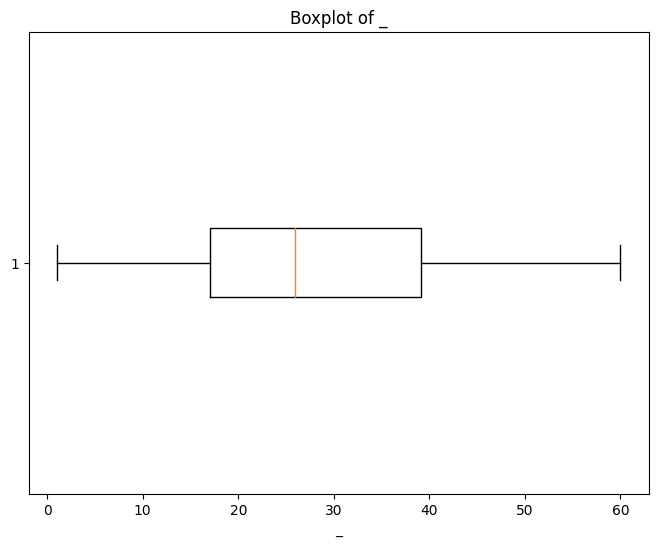

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot(taxi_['avg_speed'], vert=False)  # Create a horizontal boxplot
plt.xlabel(f'_')
plt.title(f'Boxplot of _')
plt.show()

In [ ]:
taxi_.drop(columns=['avg_speed'], inplace=True)

In [ ]:
taxi_.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2253047 entries, 0 to 3783729
Data columns (total 14 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   pickup_datetime         datetime64[ns]
 1   Trip Seconds            float64       
 2   Company                 int64         
 3   Pickup Community Area   float64       
 4   Dropoff Community Area  float64       
 5   pickup_latitude         float64       
 6   pickup_longitude        float64       
 7   dropoff_latitude        float64       
 8   dropoff_longitude       float64       
 9   month                   int32         
 10  hour                    int32         
 11  day_of_week             int32         
 12  day_of_month            int32         
 13  distance                float64       
dtypes: datetime64[ns](1), float64(8), int32(4), int64(1)
memory usage: 223.5 MB


In [ ]:
new_names = {'MO': 'month', 'HR': 'hour','DY':'day','YEAR':'year','TEMP':'tempearture','PRCP':'precipitation','HMDT':'humidity','WND_SPD':'wind_speed'}
weather = weather.rename(columns=new_names)
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8754 entries, 0 to 8753
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           8754 non-null   int64  
 1   month          8754 non-null   int64  
 2   day            8754 non-null   int64  
 3   hour           8754 non-null   int64  
 4   tempearture    8754 non-null   float64
 5   precipitation  8754 non-null   float64
 6   humidity       8754 non-null   float64
 7   wind_speed     8754 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 547.2 KB


In [ ]:
taxi_.columns

Index(['pickup_datetime', 'Trip Seconds', 'Company', 'Pickup Community Area',
       'Dropoff Community Area', 'pickup_latitude', 'pickup_longitude',
       'dropoff_latitude', 'dropoff_longitude', 'month', 'hour', 'day_of_week',
       'day_of_month', 'distance'],
      dtype='object')

In [ ]:
weather.columns

Index(['year', 'month', 'day', 'hour', 'tempearture', 'precipitation',
       'humidity', 'wind_speed'],
      dtype='object')

In [ ]:
taxi_.rename(columns={'day_of_month': 'day'}, inplace=True)

In [ ]:
weather.drop(['year'],axis = 1, inplace = True)

In [ ]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8754 entries, 0 to 8753
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          8754 non-null   int64  
 1   day            8754 non-null   int64  
 2   hour           8754 non-null   int64  
 3   tempearture    8754 non-null   float64
 4   precipitation  8754 non-null   float64
 5   humidity       8754 non-null   float64
 6   wind_speed     8754 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 478.9 KB


In [ ]:
merged_df = pd.merge(taxi_, weather, on=['month', 'day', 'hour'], how='left')

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253047 entries, 0 to 2253046
Data columns (total 18 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   pickup_datetime         datetime64[ns]
 1   Trip Seconds            float64       
 2   Company                 int64         
 3   Pickup Community Area   float64       
 4   Dropoff Community Area  float64       
 5   pickup_latitude         float64       
 6   pickup_longitude        float64       
 7   dropoff_latitude        float64       
 8   dropoff_longitude       float64       
 9   month                   int32         
 10  hour                    int32         
 11  day_of_week             int32         
 12  day                     int32         
 13  distance                float64       
 14  tempearture             float64       
 15  precipitation           float64       
 16  humidity                float64       
 17  wind_speed              float64       
dtypes:

In [ ]:
merged_df.tail()

,pickup_datetime,Trip Seconds,Company,Pickup Community Area,Dropoff Community Area,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,month,hour,day_of_week,day,distance,tempearture,precipitation,humidity,wind_speed
2253042,2023-08-01,240.0,30,33.0,35.0,41.857184,-87.620335,41.835118,-87.618678,8,0,1,1,2.590832,21.22,0.0,75.31,3.65
2253043,2023-08-01,900.0,13,8.0,21.0,41.899602,-87.633308,41.938666,-87.711211,8,0,1,1,10.791269,21.22,0.0,75.31,3.65
2253044,2023-08-01,1320.0,30,28.0,41.0,41.874005,-87.663518,41.794090,-87.592311,8,0,1,1,14.781883,21.22,0.0,75.31,3.65
2253045,2023-08-01,780.0,13,28.0,5.0,41.874005,-87.663518,41.947792,-87.683835,8,0,1,1,9.886878,21.22,0.0,75.31,3.65
2253046,2023-08-01,1020.0,30,34.0,8.0,41.842076,-87.633973,41.899602,-87.633308,8,0,1,1,6.451718,21.22,0.0,75.31,3.65


In [ ]:
data_cleaned = merged_df.copy()

In [ ]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253047 entries, 0 to 2253046
Data columns (total 18 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   pickup_datetime         datetime64[ns]
 1   Trip Seconds            float64       
 2   Company                 int64         
 3   Pickup Community Area   float64       
 4   Dropoff Community Area  float64       
 5   pickup_latitude         float64       
 6   pickup_longitude        float64       
 7   dropoff_latitude        float64       
 8   dropoff_longitude       float64       
 9   month                   int32         
 10  hour                    int32         
 11  day_of_week             int32         
 12  day                     int32         
 13  distance                float64       
 14  tempearture             float64       
 15  precipitation           float64       
 16  humidity                float64       
 17  wind_speed              float64       
dtypes:

In [ ]:
#data_cleaned.drop(columns=['pickup_longitude', 'pickup_latitude', 'dropoff_latitude', 'dropoff_longitude'], axis=1,inplace = True)

In [ ]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253047 entries, 0 to 2253046
Data columns (total 18 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   pickup_datetime         datetime64[ns]
 1   Trip Seconds            float64       
 2   Company                 int64         
 3   Pickup Community Area   float64       
 4   Dropoff Community Area  float64       
 5   pickup_latitude         float64       
 6   pickup_longitude        float64       
 7   dropoff_latitude        float64       
 8   dropoff_longitude       float64       
 9   month                   int32         
 10  hour                    int32         
 11  day_of_week             int32         
 12  day                     int32         
 13  distance                float64       
 14  tempearture             float64       
 15  precipitation           float64       
 16  humidity                float64       
 17  wind_speed              float64       
dtypes:

In [ ]:
def encode_is_rush_hour(x):
  if 6 <= x <= 8:
    return 1
  elif 16 <= x <= 18:
    return 1
  else:
    return 0
data_cleaned['is_rush_hour'] = data_cleaned['hour'].apply(encode_is_rush_hour)

In [ ]:
def encode_is_weekend(x):
  if x == 5 or x == 6:
    return 1
  else:
    return 0
data_cleaned['is_weekend'] = data_cleaned['day_of_week'].apply(encode_is_weekend)

In [ ]:
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays(start=data_cleaned['pickup_datetime'].min(), end=data_cleaned['pickup_datetime'].max())

In [ ]:
data_cleaned['is_holiday'] = data_cleaned['pickup_datetime'].isin(holidays).astype(int)

In [ ]:
data_cleaned['is_work_day'] = ((data_cleaned['is_weekend'] == 0) & (data_cleaned['is_holiday'] == 0)).astype(int)

In [ ]:
data_cleaned['is_work_day'].value_counts()

is_work_day
1    1751535
0     501512
Name: count, dtype: int64

In [ ]:
data_cleaned.drop(['is_weekend','is_holiday'],axis = 1, inplace = True)

In [ ]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253047 entries, 0 to 2253046
Data columns (total 20 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   pickup_datetime         datetime64[ns]
 1   Trip Seconds            float64       
 2   Company                 int64         
 3   Pickup Community Area   float64       
 4   Dropoff Community Area  float64       
 5   pickup_latitude         float64       
 6   pickup_longitude        float64       
 7   dropoff_latitude        float64       
 8   dropoff_longitude       float64       
 9   month                   int32         
 10  hour                    int32         
 11  day_of_week             int32         
 12  day                     int32         
 13  distance                float64       
 14  tempearture             float64       
 15  precipitation           float64       
 16  humidity                float64       
 17  wind_speed              float64       
 18  is

In [ ]:
data_cleaned.to_csv('/content/drive/MyDrive/data/data_cleaned_v3.csv',index = False)